# 1. Problem statement:- 

### In this project we will be predicting the Grade of milk  based on  pH value, Temprature, Taste,Odor, Fat, Turbidity, & Colour.

# 2.Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix,roc_curve
from sklearn.metrics import precision_score,recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix,roc_curve, multilabel_confusion_matrix
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 3.Data Gathering

In [2]:
df = pd.read_csv('milknew.csv')
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


# 4.Exploratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [4]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [5]:
df['Grade'].value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

# 5.Feature Engineering

### 5.1 pH

<AxesSubplot:xlabel='pH'>

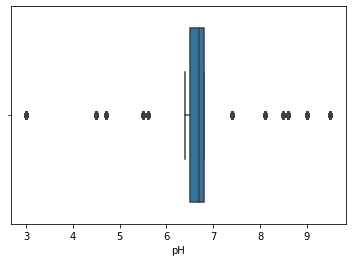

In [6]:
sns.boxplot(x= df['pH'])

In [15]:
q1_pH= df['pH'].quantile(0.25)
q2_pH= df['pH'].quantile(0.50)
q3_pH= df['pH'].quantile(0.75)
median_pH = df['pH'].median()
print("Q1_pH :", q1_pH)
print("Q2_pH:", q2_pH)
print("Q3_pH :", q3_pH)
print("median_pH :", median_pH)

iqr_pH = q3_pH - q1_pH

upper_tail_pH = q3_pH + 1.5*iqr_pH
lower_tail_pH = q1_pH - 1.5*iqr_pH
print("upper_tail  :",upper_tail_pH)
print("lower_tail  :",lower_tail_pH)

Q1_pH : 6.5
Q2_pH: 6.7
Q3_pH : 6.8
median_pH : 6.7
upper_tail  : 7.25
lower_tail  : 6.050000000000001


In [19]:
df.loc[df['pH'] > upper_tail_pH,'pH'] = median_pH
df.loc[df['pH'] > upper_tail_pH,'pH']

Series([], Name: pH, dtype: float64)

In [21]:
df.loc[df['pH'] < lower_tail_pH,'pH'] = median_pH
df.loc[df['pH'] < lower_tail_pH,'pH']

Series([], Name: pH, dtype: float64)

<AxesSubplot:xlabel='pH'>

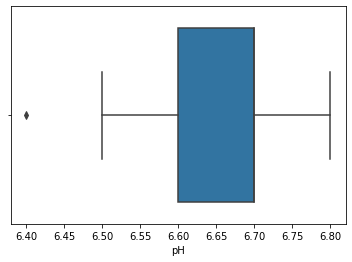

In [22]:
sns.boxplot(x= df['pH'])

### 5.2 Temperature

<AxesSubplot:xlabel='Temprature'>

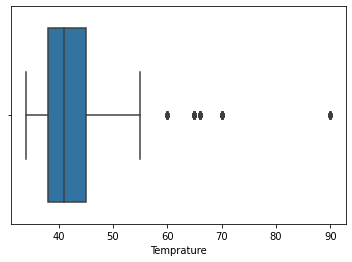

In [24]:
sns.boxplot(x= df['Temprature'])

In [25]:
q1_Temprature= df['Temprature'].quantile(0.25)
q2_Temprature= df['Temprature'].quantile(0.50)
q3_Temprature= df['Temprature'].quantile(0.75)
median_Temprature = df['Temprature'].median()
print("Q1_Temprature :", q1_Temprature)
print("Q2_Temprature:", q2_Temprature)
print("Q3_Temprature :", q3_Temprature)
print("median_Temprature :", median_Temprature)

iqr_Temprature = q3_Temprature - q1_Temprature

upper_tail_Temprature = q3_Temprature + 1.5*iqr_Temprature
lower_tail_Temprature = q1_Temprature - 1.5*iqr_Temprature
print("upper_tail  :",upper_tail_Temprature)
print("lower_tail  :",lower_tail_Temprature)

Q1_Temprature : 38.0
Q2_Temprature: 41.0
Q3_Temprature : 45.0
median_Temprature : 41.0
upper_tail  : 55.5
lower_tail  : 27.5


In [27]:
df.loc[df['Temprature'] > upper_tail_Temprature,'Temprature'] 

Series([], Name: Temprature, dtype: int64)

In [29]:
df.loc[df['Temprature'] < lower_tail_Temprature,'Temprature'] = median_Temprature
df.loc[df['Temprature'] < lower_tail_Temprature,'Temprature']

Series([], Name: Temprature, dtype: int64)

<AxesSubplot:xlabel='Temprature'>

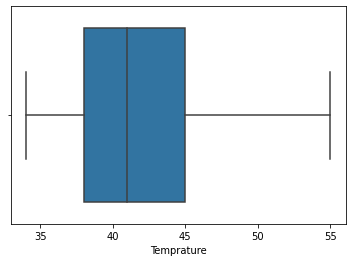

In [30]:
sns.boxplot(x= df['Temprature'])

### 5.3 Taste

<AxesSubplot:xlabel='Taste'>

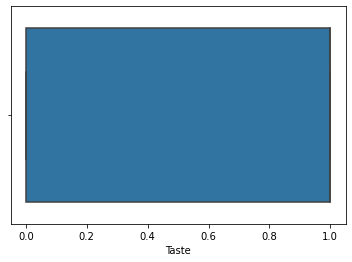

In [31]:
sns.boxplot(x= df['Taste'])

## 5.4 Odor

<AxesSubplot:xlabel='Odor'>

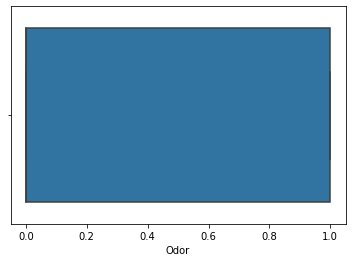

In [32]:
sns.boxplot(x= df['Odor'])

### 5.5 Fat

In [33]:
sns.boxplot(x= df['Fat'])

KeyError: 'Fat'

### 5.6 Turbidity

<AxesSubplot:xlabel='Turbidity'>

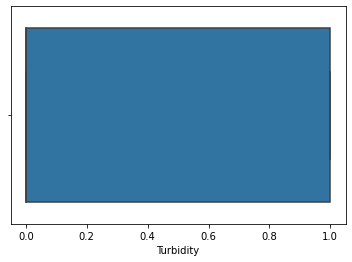

In [34]:
sns.boxplot(x= df['Turbidity'])

### 5.7 Colour

<AxesSubplot:xlabel='Colour'>

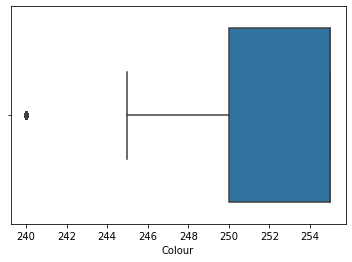

In [35]:
sns.boxplot(x= df['Colour'])

In [36]:
q1_Colour= df['Colour'].quantile(0.25)
q2_Colour= df['Colour'].quantile(0.50)
q3_Colour= df['Colour'].quantile(0.75)
median_Colour = df['Colour'].median()
print("Q1_Colour :", q1_Colour)
print("Q2_Colour:", q2_Colour)
print("Q3_Colour :", q3_Colour)
print("median_Colour :", median_Colour)

iqr_Colour = q3_Colour  - q1_Colour

upper_tail_Colour = q3_Colour + 1.5*iqr_Colour
lower_tail_Colour = q1_Colour - 1.5*iqr_Colour
print("upper_tail  :",upper_tail_Colour)
print("lower_tail  :",lower_tail_Colour)

Q1_Colour : 250.0
Q2_Colour: 255.0
Q3_Colour : 255.0
median_Colour : 255.0
upper_tail  : 262.5
lower_tail  : 242.5


In [41]:
df.loc[df['Colour'] < lower_tail_Colour,'Colour'] = median_Colour
df.loc[df['Colour'] < lower_tail_Colour,'Colour'] 

Series([], Name: Colour, dtype: int64)

<AxesSubplot:xlabel='Colour'>

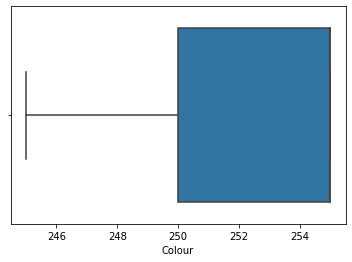

In [42]:
sns.boxplot(x= df['Colour'])

#  Algorithm-1:- Logistic Regression 

## 6 Train Test Split

In [43]:
x = df.drop('Grade',axis = 1)
y = df['Grade']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=11,stratify=y)

In [44]:
y_train.value_counts()

low       322
medium    280
high      192
Name: Grade, dtype: int64

In [45]:
y_test.value_counts()

low       107
medium     94
high       64
Name: Grade, dtype: int64

## Model Training

In [46]:
logistic_model = LogisticRegression(multi_class= 'ovr')
logistic_model.fit(x_train, y_train)

LogisticRegression(multi_class='ovr')

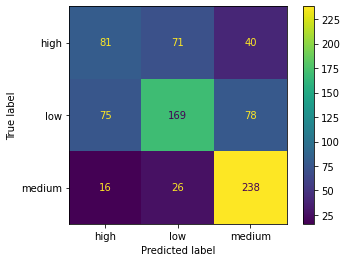

In [47]:
plot_confusion_matrix(logistic_model,x_train, y_train)

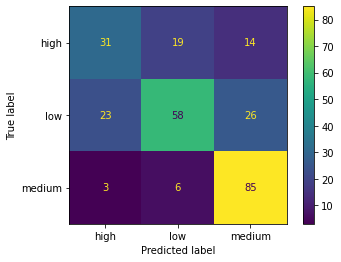

In [48]:
plot_confusion_matrix(logistic_model,x_test, y_test)

In [49]:
logistic_model.score(x_train, y_train)

0.6146095717884131

In [50]:
logistic_model.score(x_test, y_test)

0.6566037735849056

## Model Evaluation

In [51]:
y_pred = logistic_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*88)

multilabel_cnf_matrix = multilabel_confusion_matrix(y_test, y_pred)
print("MultiLabel Confusion Matrix :\n",multilabel_cnf_matrix)
print("*"*88)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)
print("*"*88)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[31 19 14]
 [23 58 26]
 [ 3  6 85]]
****************************************************************************************
MultiLabel Confusion Matrix :
 [[[175  26]
  [ 33  31]]

 [[133  25]
  [ 49  58]]

 [[131  40]
  [  9  85]]]
****************************************************************************************
Accuracy : 0.6566037735849056
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

        high       0.54      0.48      0.51        64
         low       0.70      0.54      0.61       107
      medium       0.68      0.90      0.78        94

    accuracy                           0.66       265
   macro avg       0.64      0.64      0.63       265
weighted avg       0.65      0.66      0.65       265



In [52]:
# Training Data Evaluation
y_pred_train = logistic_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*88)

multilabel_cnf_matrix = multilabel_confusion_matrix(y_train, y_pred_train)
print("MultiLabel Confusion Matrix :\n",multilabel_cnf_matrix)
print("*"*88)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)
print("*"*88)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[ 81  71  40]
 [ 75 169  78]
 [ 16  26 238]]
****************************************************************************************
MultiLabel Confusion Matrix :
 [[[511  91]
  [111  81]]

 [[375  97]
  [153 169]]

 [[396 118]
  [ 42 238]]]
****************************************************************************************
Accuracy : 0.6146095717884131
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

        high       0.47      0.42      0.45       192
         low       0.64      0.52      0.57       322
      medium       0.67      0.85      0.75       280

    accuracy                           0.61       794
   macro avg       0.59      0.60      0.59       794
weighted avg       0.61      0.61      0.60       794



In [ ]:
## Outlier imputed by median

In [59]:
mean_pH = df.loc[(df['pH'] <= upper_tail_pH) &
(df['pH'] >= lower_tail_pH),'pH'].mean()
mean_pH

6.65720588235294